<a href="https://colab.research.google.com/github/TheOzzyLot/AH2179/blob/main/Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("Exercise2BusData.csv")
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)
df.head(10)

,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,-23,0,39,-4,28.641509
1,168,0,39,181,27.880597
2,231,0,39,244,27.852941
3,150,17,39,143,27.826087
4,965,35,51,947,42.029412
5,33,19,46,30,38.970588
6,75,26,46,63,38.840580
7,58,15,46,52,34.059701
8,904,35,46,888,34.102941
9,141,12,46,140,34.000000


<Axes: xlabel='Arrival_delay', ylabel='Count'>

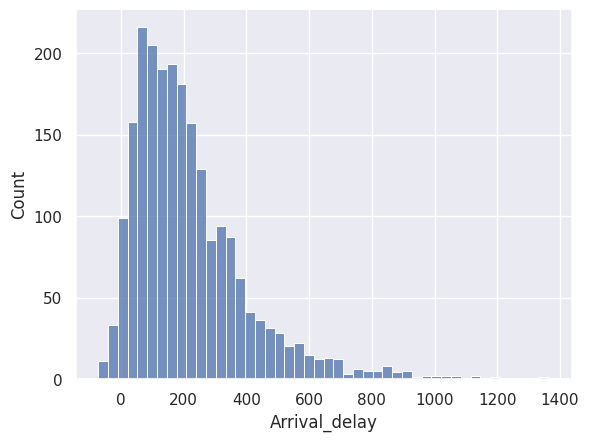

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.histplot(x=df['Arrival_delay'])

Mean Absolute Error: 9.654193995146553
Mean Squared Error: 176.3735387676195
R-squared: 0.9940853862137997


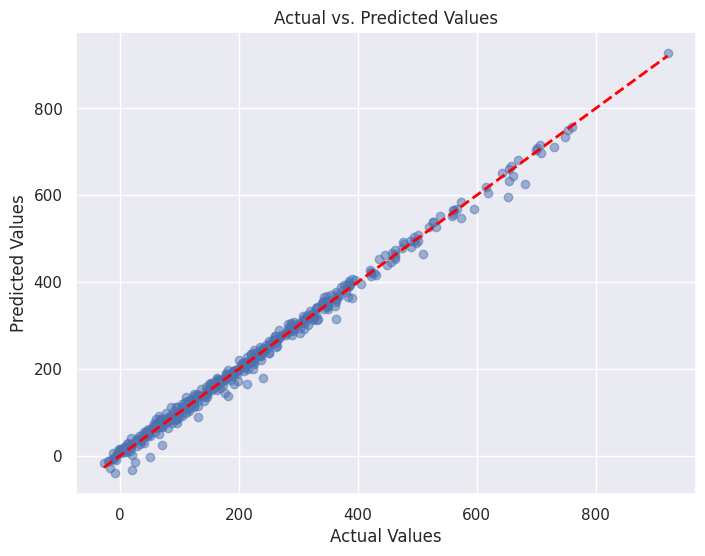

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)
plt.show()

In [ ]:
pip install xgboost

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import xgboost as xgb

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror',random_state=42)# Default Learning Task parameter

param_grid = {
    'n_estimators': [100, 150], # Number of trees
    'max_depth': [3, 5], # How far the trees will go
    'learning_rate': [0.01, 0.1, 1, 10], # ETA
    'subsample': [0.8], # Ratio of training instances
    'colsample_bytree': [0.8], # Subsample ratio of columns for every tree constructed
    'reg_alpha': [0, 0.1, 0.5], # Alpha (L1) parameter to make the model more conservative (less risk of overfitting)
    'reg_lambda': [1, 1.5, 2] # Lambda (L2) parameter to make the model more conservative (less risk of overfitting)
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_

print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [-9084.10054927 -9223.52692069 -9344.14515296 -9084.10288071
 -9223.62028184 -9344.23527053 -9085.27035967 -9223.9961938
 -9343.7658501  -4269.83821035 -4394.89339597 -4500.62072569
 -4270.25863745 -4394.98317116 -4501.43085872 -4272.22678316
 -4395.34558318 -4500.63145065 -8985.10843245 -9140.18239155
 -9266.33070208 -8986.49518869 -9140.77068802 -9266.41257057
 -8985.8617905  -9139.73840679 -9265.30269334 -4253.52624505
 -4394.45998702 -4504.40132582 -4253.01159651 -4393.1848808
 -4504.6373089  -4253.40408701 -4393.76977347 -4503.70034964
  -318.04757849  -319.32831871  -315.12590773  -317.73327379
  -317.63349347  -315.07482529  -317.22889814  -320.28108496
  -316.61366192  -308.93454637  -311.33940404  -301.72642469
  -308.75268873  -308.13610602  -301.65888804  -307.78769986
  -311.25906867  -301.42293445  -399.02118855  -389.27470893
  -396.6

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'reg_alpha': 0.5, 'reg_lambda': 2, 'subsample': 0.8}
Best Score: -301.4229344474337


Mean Absolute Error: 10.837520371609871
Mean Squared Error: 220.1790010105854
R-squared: 0.9926163881276725


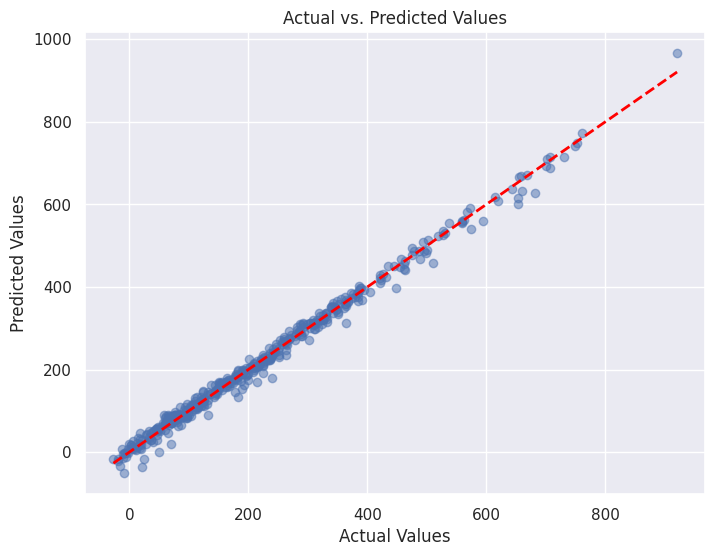

In [ ]:
best_xgb = xgb.XGBRegressor(objective='reg:squarederror', **best_params)
best_xgb.fit(X_train_scaled, y_train)

y_pred = best_xgb.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)
plt.show()